In [1]:
%load_ext autoreload
%autoreload 2

import pdb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('agg')
sns.set_context('notebook')

import matplotlib.pyplot as plt


In [2]:
INP_DIR = '/userdata/gmakhoul/PR01/rvc_stim/win30'
BANDS = ['delta', 'theta', 'alpha', 'beta', 'gamma_low', 'gamma_high']


## Investigating Affect of Stim on RVC Gamma Activity

In this notebook we will load trials where stimualtion at therpeutic site was performed and investigate how gamma oscillations change in accordance with changes in mood

In [3]:
post_stim_RA_df = pd.read_csv("source_data/wavelet_data.csv")

In [4]:
# multiply by two for cleanliness in plotting. 
#time 0 is pre stim, time 1 is post stim
post_stim_RA_df['time'] = post_stim_RA_df['time']*2

In [5]:
post_stim_RA_df

,Unnamed: 0,delta,theta,alpha,beta,gamma_low,gamma_high,time,trial,mood_change
0,0,0.236624,0.093053,0.072696,0.049719,0.029394,0.018514,0.0,3,positive
1,0,0.324121,0.064447,0.044289,0.029891,0.023648,0.013604,1.0,3,positive
2,0,0.197712,0.075869,0.074989,0.066714,0.052896,0.031819,0.0,10,positive
3,0,0.184149,0.095862,0.071290,0.066355,0.051239,0.031105,1.0,10,positive
4,0,0.157242,0.124951,0.111212,0.065772,0.028791,0.012033,0.0,2,neg_neutral
5,0,0.171727,0.117506,0.097944,0.068690,0.029551,0.014582,1.0,2,neg_neutral
6,0,0.117984,0.136151,0.100567,0.070393,0.043654,0.031250,0.0,6,neg_neutral
7,0,0.168333,0.092963,0.074351,0.074577,0.055154,0.034622,1.0,6,neg_neutral
8,0,0.206868,0.082898,0.067780,0.066276,0.044741,0.031436,0.0,8,neg_neutral
9,0,0.173350,0.101016,0.075223,0.065932,0.049771,0.034708,1.0,8,neg_neutral


## Plotting Gamma Low vs Mood

Note that plots will contain absolute values pre post whereas paper simplifies plots by showing differences

<IPython.core.display.Javascript object>


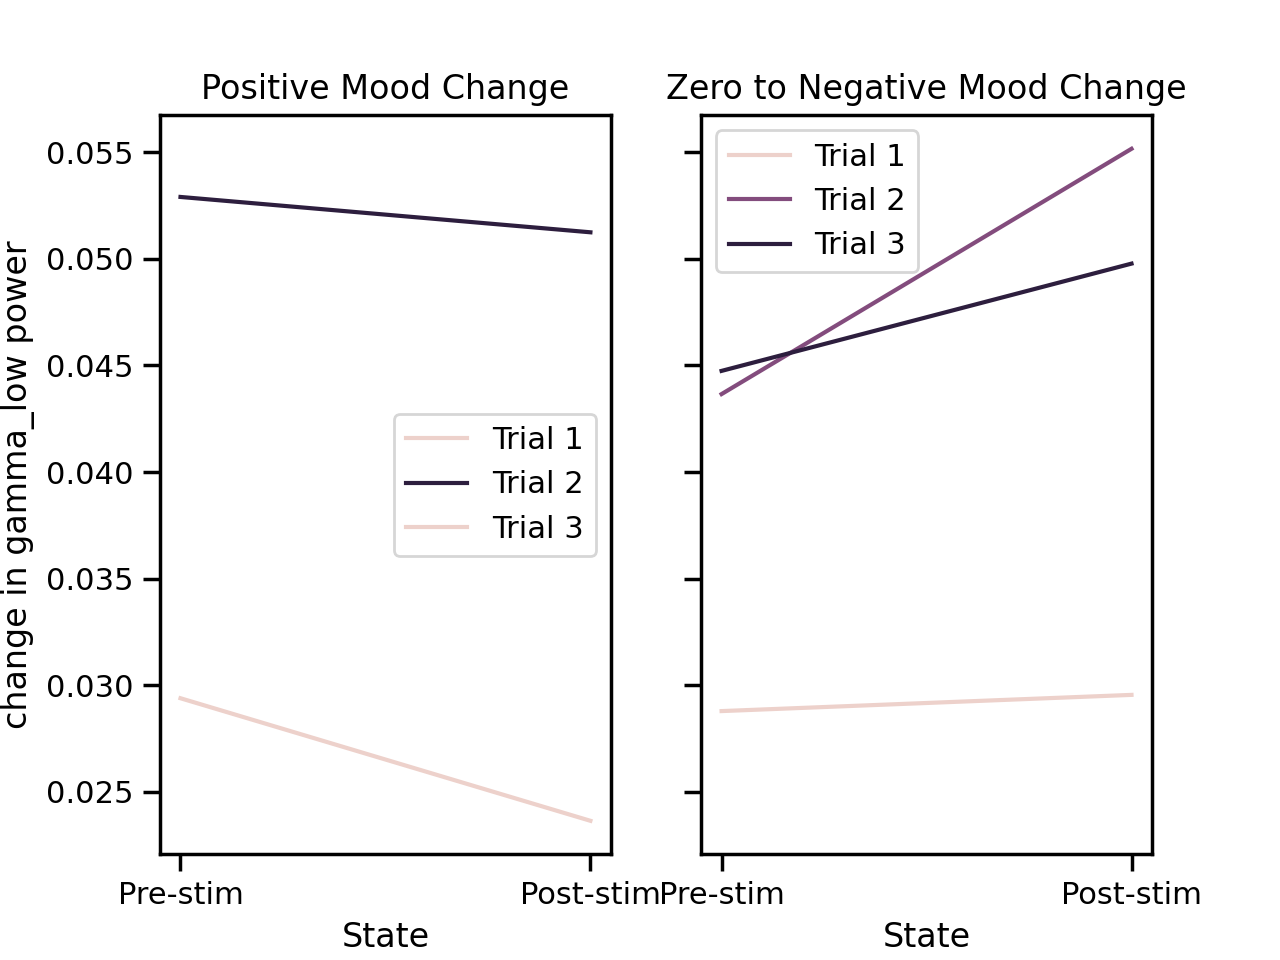

In [6]:
%matplotlib notebook

fig, [ax1,ax2] = plt.subplots(1,2,sharey=True)

ax = sns.lineplot(data=post_stim_RA_df[post_stim_RA_df.mood_change =='positive'], y='gamma_low',x='time', hue='trial', ax=ax1)

ax1.set(xlabel='State', ylabel='change in gamma_low power')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['Pre-stim','Post-stim'])
ax1.set_title("Positive Mood Change")
ax1.legend(['Trial 1',"Trial 2","Trial 3"])
plt.subplots_adjust(hspace=10)


ax = sns.lineplot(data=post_stim_RA_df[post_stim_RA_df.mood_change =='neg_neutral'], y='gamma_low',x='time', hue='trial',ax=ax2)
ax2.set_xticks([0,1])
ax2.set_xticklabels(['Pre-stim','Post-stim'])
ax2.set(xlabel='State', ylabel='change in gamma_low power')
ax2.set_title("Zero to Negative Mood Change")
ax2.legend(['Trial 1',"Trial 2","Trial 3"])
plt.savefig("pre_post_gamma_low.pdf")

## Plotting Gamma_high vs Mood

<IPython.core.display.Javascript object>


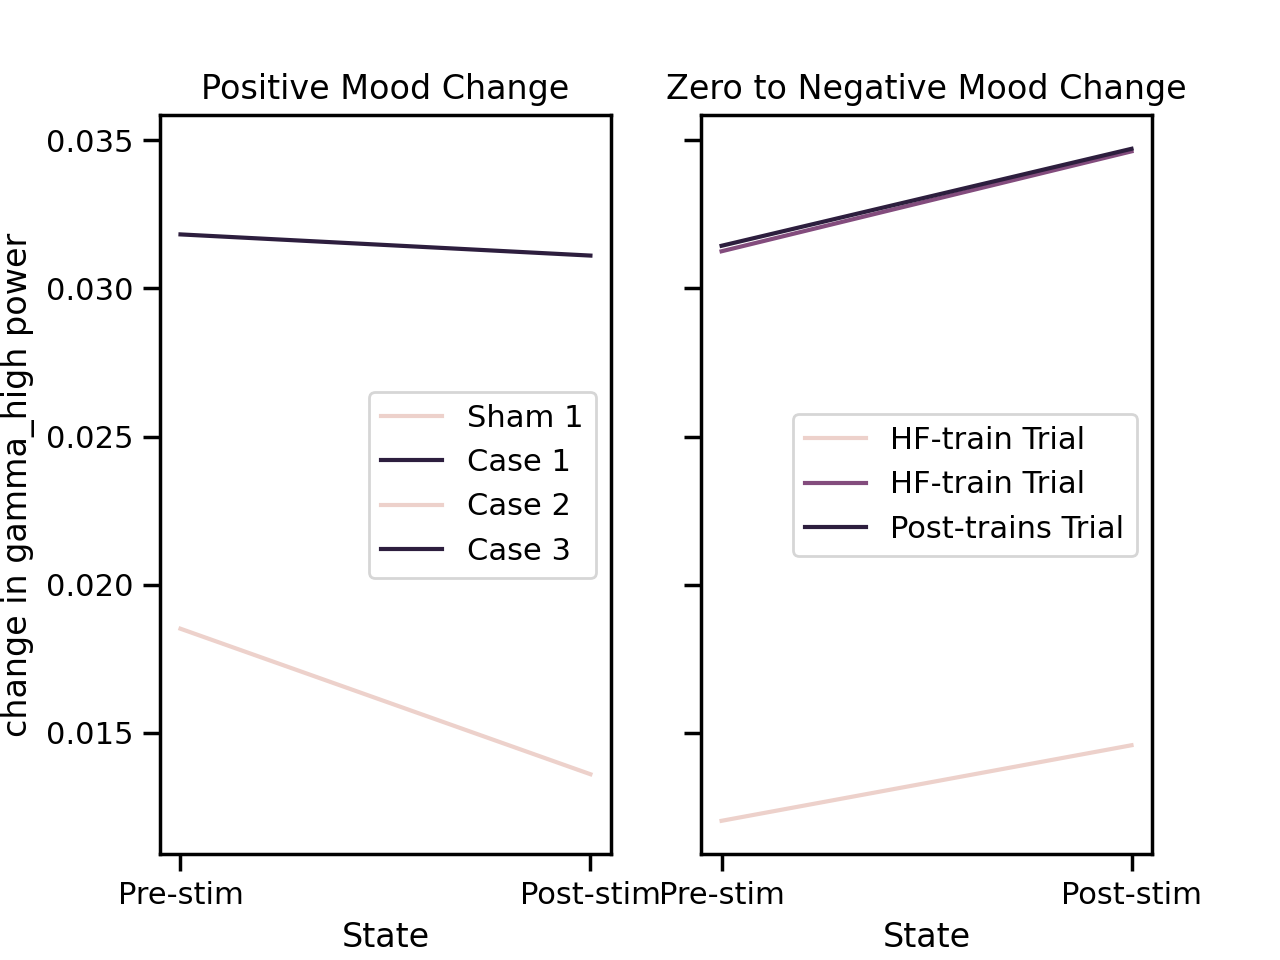

In [7]:
%matplotlib notebook

fig, [ax1,ax2] = plt.subplots(1,2,sharey=True)

ax = sns.lineplot(data=post_stim_RA_df[post_stim_RA_df.mood_change =='positive'], y='gamma_high',x='time', hue='trial', ax=ax1)

ax1.set(xlabel='State', ylabel='change in gamma_high power')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['Pre-stim','Post-stim'])
ax1.set_title("Positive Mood Change")
ax1.legend(['Sham 1',"Case 1","Case 2", "Case 3", "Case4"])

plt.subplots_adjust(hspace=10)


ax = sns.lineplot(data=post_stim_RA_df[post_stim_RA_df.mood_change =='neg_neutral'], y='gamma_high',x='time', hue='trial',ax=ax2)
ax2.set_xticks([0,1])
ax2.set_xticklabels(['Pre-stim','Post-stim'])
ax2.set(xlabel='State', ylabel='change in gamma_high power')
ax2.set_title("Zero to Negative Mood Change")
ax2.legend(['HF-train Trial',"HF-train Trial","Post-trains Trial"])


plt.savefig("pre_post_gamma_high.pdf")